# Trotter Bloqs

Bloqs for Trotter simulation of the real space grid Hamiltonian.

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `PolynmomialEvaluationInverseSquareRoot`
Bloq to evaluate a polynomial approximation to inverse Square root from QROM.

#### Parameters
 - `in_bitsize`: The number of bits encoding the input registers.
 - `out_bitsize`: The number of bits encoding the input registers. 

#### Registers
 - `in_c{0,1,2,3}`: QROM input containing the 4 polynomial coefficients.
 - `out`: Output register to store polynomial approximation to inverse square root. 

#### References
[Quantum computation of stopping power for inertial fusion target design](
    https://arxiv.org/pdf/2308.12352.pdf)


In [2]:
from qualtran.bloqs.chemistry.trotter.inverse_sqrt import PolynmomialEvaluationInverseSquareRoot

### Example Instances

In [3]:
poly_inv_sqrt = PolynmomialEvaluationInverseSquareRoot(7, 8, 12)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([poly_inv_sqrt],
           ['`poly_inv_sqrt`'])

### Call Graph

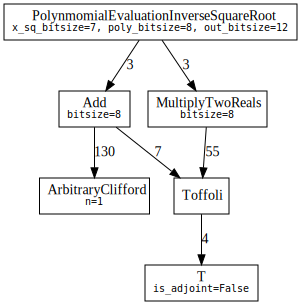

#### Counts totals:
 - `ArbitraryClifford(n=1)`: 390
 - `TGate()`: 744

In [5]:
poly_inv_sqrt_g, poly_inv_sqrt_sigma = poly_inv_sqrt.call_graph()
show_call_graph(poly_inv_sqrt_g)
show_counts_sigma(poly_inv_sqrt_sigma)

## `NewtonRaphsonApproxInverseSquareRoot`
Bloq implementing a single Newton-Raphson step to approximate the inverse square root.

Given a (polynomial) approximation for $1/\sqrt{x}$ (which will be $y_0$)
below we can approximate the inverse square root by

$$
    y_{n+1} = \frac{1}{2}y_n\left(3-y_n^2 x\right)
$$

For the case of computing the Coulomb potential we want

$$
    \frac{1}{|r_i-r_j|} = \frac{1}{\sqrt{\sum_k^3 (x^{k}_i-x^{k}_j)^2}}
$$
where $x^{k}_i$ is the $i$-th electron's coordinate in 3D and $k \in \{x,y,z\}$.
Thus the input register should store $\sum_{k=x,y,z} (x^{k}_i-x^{k}_j)^2$.

#### Parameters
 - `x_sq_bitsize`: The number of bits encoding the input (integer) register holding (x^2).
 - `poly_bitsize`: The number of bits encoding the input (fp-real) register holding y0 (the output of PolynomialEvaluation).
 - `output_bitsize`: The number of bits to store the output of the NewtonRaphson step. 

#### Registers
 - `x_sq`: an input_bitsize size register storing the value x^2.
 - `poly`: an poly_bitsize size register storing the value x^2.
 - `target`: a target_bitsize size register storing the output of the newton raphson step. 

#### References
[Faster quantum chemistry simulation on fault-tolerant quantum
    computers](https://iopscience.iop.org/article/10.1088/1367-2630/14/11/115023/meta)


In [6]:
from qualtran.bloqs.chemistry.trotter.inverse_sqrt import NewtonRaphsonApproxInverseSquareRoot

### Example Instances

In [7]:
nr_inv_sqrt = NewtonRaphsonApproxInverseSquareRoot(7, 8, 12)

#### Graphical Signature

In [8]:
from qualtran.drawing import show_bloqs
show_bloqs([nr_inv_sqrt],
           ['`nr_inv_sqrt`'])

### Call Graph

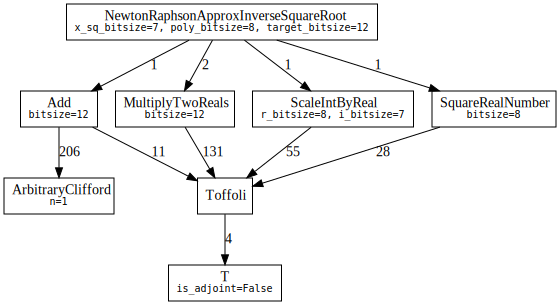

#### Counts totals:
 - `ArbitraryClifford(n=1)`: 206
 - `TGate()`: 1424

In [9]:
nr_inv_sqrt_g, nr_inv_sqrt_sigma = nr_inv_sqrt.call_graph()
show_call_graph(nr_inv_sqrt_g)
show_counts_sigma(nr_inv_sqrt_sigma)

## `QuantumVariableRotation`
Bloq implementing Quantum Variable Rotation

$$
    \sum_j c_j|\phi_j\rangle \rightarrow \sum_j e^{i \xi \phi_j}  c_j | \phi_j\rangle
$$

This is the basic implementation in Fig. 14 of the reference.

#### Parameters
 - `bitsize`: The number of bits encoding the phase angle $\phi_j$. 

#### Registers
 - `phi`: a bitsize size register storing the angle $\phi_j$. 

#### References
[Faster quantum chemistry simulation on fault-tolerant quantum
    computers](https://iopscience.iop.org/article/10.1088/1367-2630/14/11/115023/meta)
    Fig 14.


In [10]:
from qualtran.bloqs.chemistry.trotter.qvr import QuantumVariableRotation

### Example Instances

In [11]:
qvr = QuantumVariableRotation(12)

#### Graphical Signature

In [12]:
from qualtran.drawing import show_bloqs
show_bloqs([qvr],
           ['`qvr`'])

### Call Graph

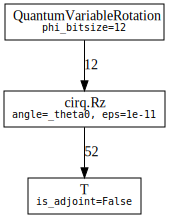

#### Counts totals:
 - `TGate()`: 624

In [13]:
qvr_g, qvr_sigma = qvr.call_graph()
show_call_graph(qvr_g)
show_counts_sigma(qvr_sigma)

## `KineticEnergy`
Bloq for the Kinetic energy unitary defined in the reference.

#### Parameters
 - `num_elec`: The number of electrons.
 - `num_grid`: The number of grid points in each of the x, y and z directions. In total, for a cubic grid, there are $N = \mathrm{num\_grid}^3$ grid points. The number of bits required (in each spatial dimension) is thus log N + 1, where the + 1 is for the sign bit. 

#### Registers
 - `system`: The system register of size eta * 3 * nb 

#### References
[Faster quantum chemistry simulation on fault-tolerant quantum
    computers](https://iopscience.iop.org/article/10.1088/1367-2630/14/11/115023/meta)


In [14]:
from qualtran.bloqs.chemistry.trotter.kinetic import KineticEnergy

### Example Instances

In [15]:
nelec = 12
ngrid_x = 2 * 8 + 1
kinetic_energy = KineticEnergy(nelec, ngrid_x)

#### Graphical Signature

In [16]:
from qualtran.drawing import show_bloqs
show_bloqs([kinetic_energy],
           ['`kinetic_energy`'])

### Call Graph

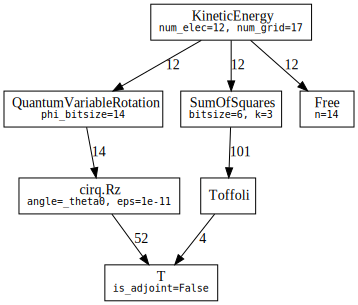

#### Counts totals:
 - `Free(n=14)`: 12
 - `TGate()`: 13584

In [17]:
kinetic_energy_g, kinetic_energy_sigma = kinetic_energy.call_graph()
show_call_graph(kinetic_energy_g)
show_counts_sigma(kinetic_energy_sigma)

## `PairPotential`
Potential Energy bloq for single pair of particles i and j.

#### Parameters
 - `bitsize`: The number of bits for a single component of the system register.
 - `qrom_data`: The polynomial coefficients to load by QROM.
 - `poly_bitsize`: The number of bits of precision for the polynomial coefficients.
 - `label`: A label for the bloqs short name. The potential bloq can encode any sort of Coulomb interaction (electron-electron, election-ion, ion-ion,...) so can be reused. This label is to distinguish these different cases. 

#### Registers
 - `system_i`: The ith electron's register.
 - `system_j`: The jth electron's register. 

#### References
[Faster quantum chemistry simulation on fault-tolerant quantum
    computers](https://iopscience.iop.org/article/10.1088/1367-2630/14/11/115023/meta)


In [18]:
from qualtran.bloqs.chemistry.trotter.potential import PairPotential, build_qrom_data_for_poly_fit
from qualtran.bloqs.chemistry.trotter.inverse_sqrt import get_inverse_square_root_poly_coeffs

### Example Instances

In [19]:
bitsize = 7
poly_bitsize = 15
poly_coeffs = get_inverse_square_root_poly_coeffs()
qrom_data = build_qrom_data_for_poly_fit(2 * bitsize + 2, poly_bitsize, poly_coeffs)
qrom_data = tuple(tuple(int(k) for k in d) for d in qrom_data)
pair_potential = PairPotential(bitsize=bitsize, qrom_data=qrom_data, poly_bitsize=poly_bitsize)

#### Graphical Signature

In [20]:
from qualtran.drawing import show_bloqs
show_bloqs([pair_potential],
           ['`pair_potential`'])

### Call Graph

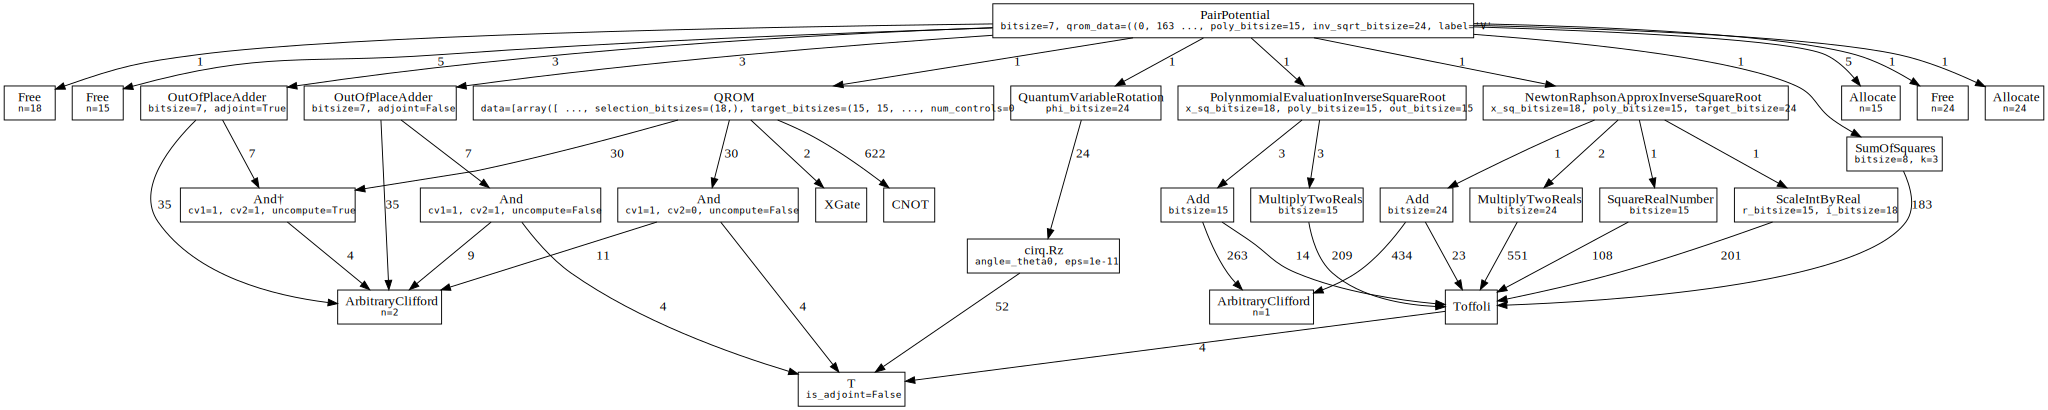

#### Counts totals:
 - `Allocate(n=15)`: 5
 - `Allocate(n=24)`: 1
 - `ArbitraryClifford(n=1)`: 1223
 - `ArbitraryClifford(n=2)`: 933
 - `CNOT()`: 622
 - `Free(n=15)`: 5
 - `Free(n=18)`: 1
 - `Free(n=24)`: 1
 - `TGate()`: 10596
 - `XGate()`: 2

In [21]:
pair_potential_g, pair_potential_sigma = pair_potential.call_graph()
show_call_graph(pair_potential_g)
show_counts_sigma(pair_potential_sigma)

## `PotentialEnergy`
Bloq for a Coulombic Unitary.

This is a basic implementation which just iterates through num_elec *
(num_elec - 1) electron pairs.

#### Parameters
 - `num_elec`: The number of electrons.
 - `num_grid`: The number of grid points in each of the x, y and z directions. In total, for a cubic grid there are N = num_grid**3 grid points. The number of bits required (in each spatial dimension) is thus log N + 1, where the + 1 is for the sign bit.
 - `label`: A label for the bloqs short name. The potential bloq can encode any sort of Coulomb interaction (electron-electron, election-ion, ion-ion,...) so can be reused. This label is to distinguish these different cases. 

#### Registers
 - `system`: The system register of size eta * 3 * nb 

#### References
[Faster quantum chemistry simulation on fault-tolerant quantum
    computers](https://iopscience.iop.org/article/10.1088/1367-2630/14/11/115023/meta)


In [22]:
from qualtran.bloqs.chemistry.trotter.potential import PotentialEnergy

### Example Instances

In [23]:
nelec = 12
ngrid_x = 2 * 8 + 1
potential_energy = PotentialEnergy(nelec, ngrid_x)

#### Graphical Signature

In [24]:
from qualtran.drawing import show_bloqs
show_bloqs([potential_energy],
           ['`potential_energy`'])

### Call Graph

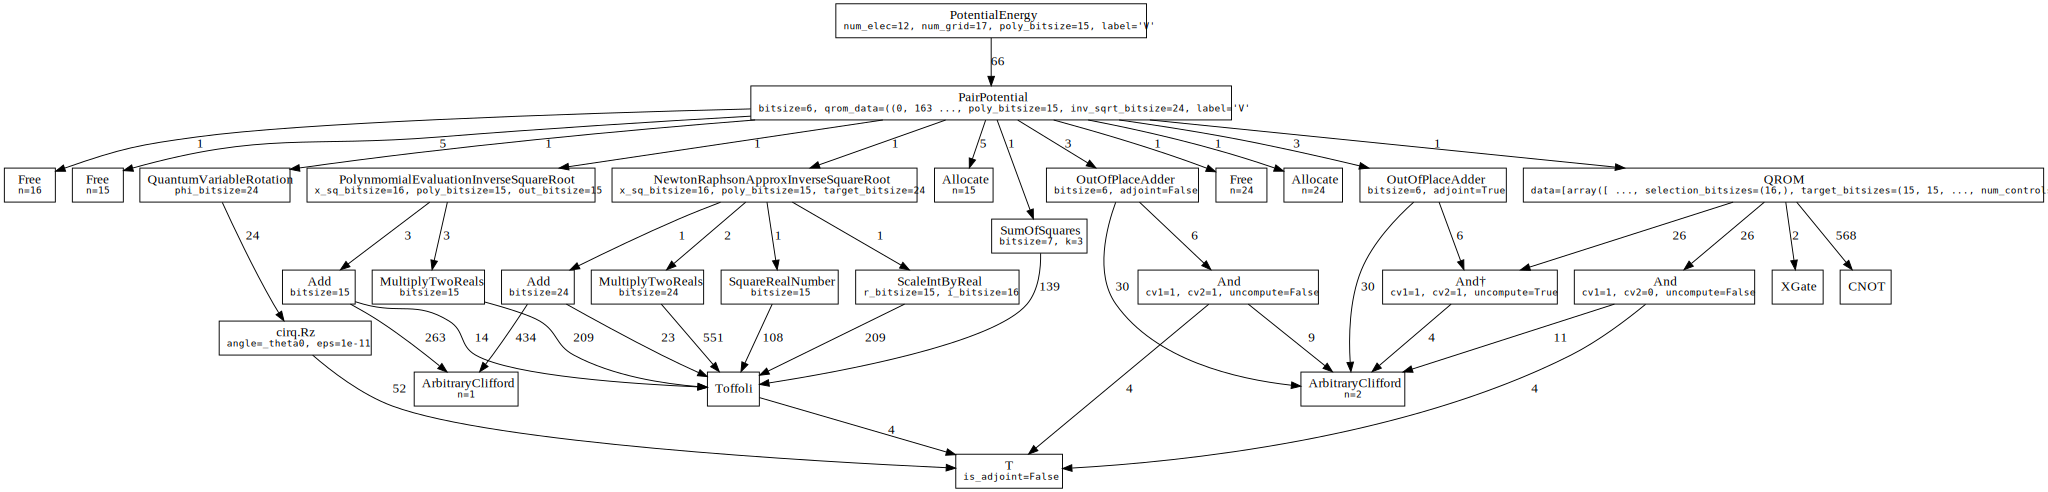

#### Counts totals:
 - `Allocate(n=15)`: 330
 - `Allocate(n=24)`: 66
 - `ArbitraryClifford(n=1)`: 80718
 - `ArbitraryClifford(n=2)`: 53064
 - `CNOT()`: 37488
 - `Free(n=15)`: 330
 - `Free(n=16)`: 66
 - `Free(n=24)`: 66
 - `TGate()`: 687984
 - `XGate()`: 132

In [25]:
potential_energy_g, potential_energy_sigma = potential_energy.call_graph()
show_call_graph(potential_energy_g)
show_counts_sigma(potential_energy_sigma)